# Seaborn Visualization & knn Classification (Star Data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
data_stellar = pd.read_csv("star_classification.csv")

### Overview:

In [3]:
data_stellar.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
data_stellar.describe()
# count is perfect, there's no missing data 
# we can see a huge gap between the variables max & min
# we can't work with any given type of models
# for example we can find a modal that finds 9 negligable compared to 18
# we will give the chance for all variables 

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [5]:
# we can notice that despite class the other columns are float or int which will serve our classification very well .. i hope
data_stellar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

## The analysis

In [6]:
data_stellar['class'].value_counts()
# ther's a difference, it's not that big 
# but it counts 
# don't apply anything bfr trying the data out 
# we use the data as it is, if the resaults weren't good we can apply other methods 

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

#### Correlation:

<AxesSubplot:>

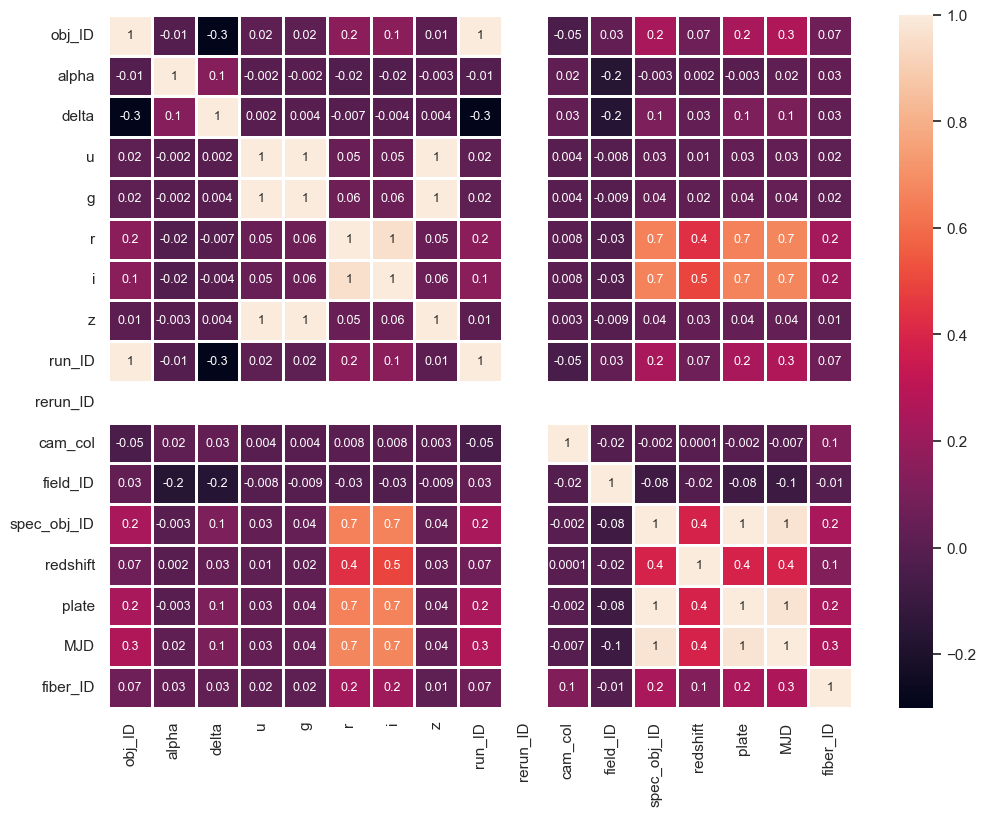

In [7]:
# corr
plt.figure(figsize=(12,9))
sns.heatmap(data_stellar.corr(), annot= True, annot_kws={"size":9},fmt=".1g", linewidths=2)

In [8]:
# informations redantentes
# bizzarement g u z sont totalememt correlees
# we need to keep just one of them


### Visualisation :

In [9]:
#visualize features 

# preparing data for visuaslistation 
features_stellar = data_stellar.copy()
features_stellar .drop(['obj_ID','class'], axis=1,inplace=True)

In [10]:
columns = list(features_stellar.columns)

In [11]:
columns

['alpha',
 'delta',
 'u',
 'g',
 'r',
 'i',
 'z',
 'run_ID',
 'rerun_ID',
 'cam_col',
 'field_ID',
 'spec_obj_ID',
 'redshift',
 'plate',
 'MJD',
 'fiber_ID']

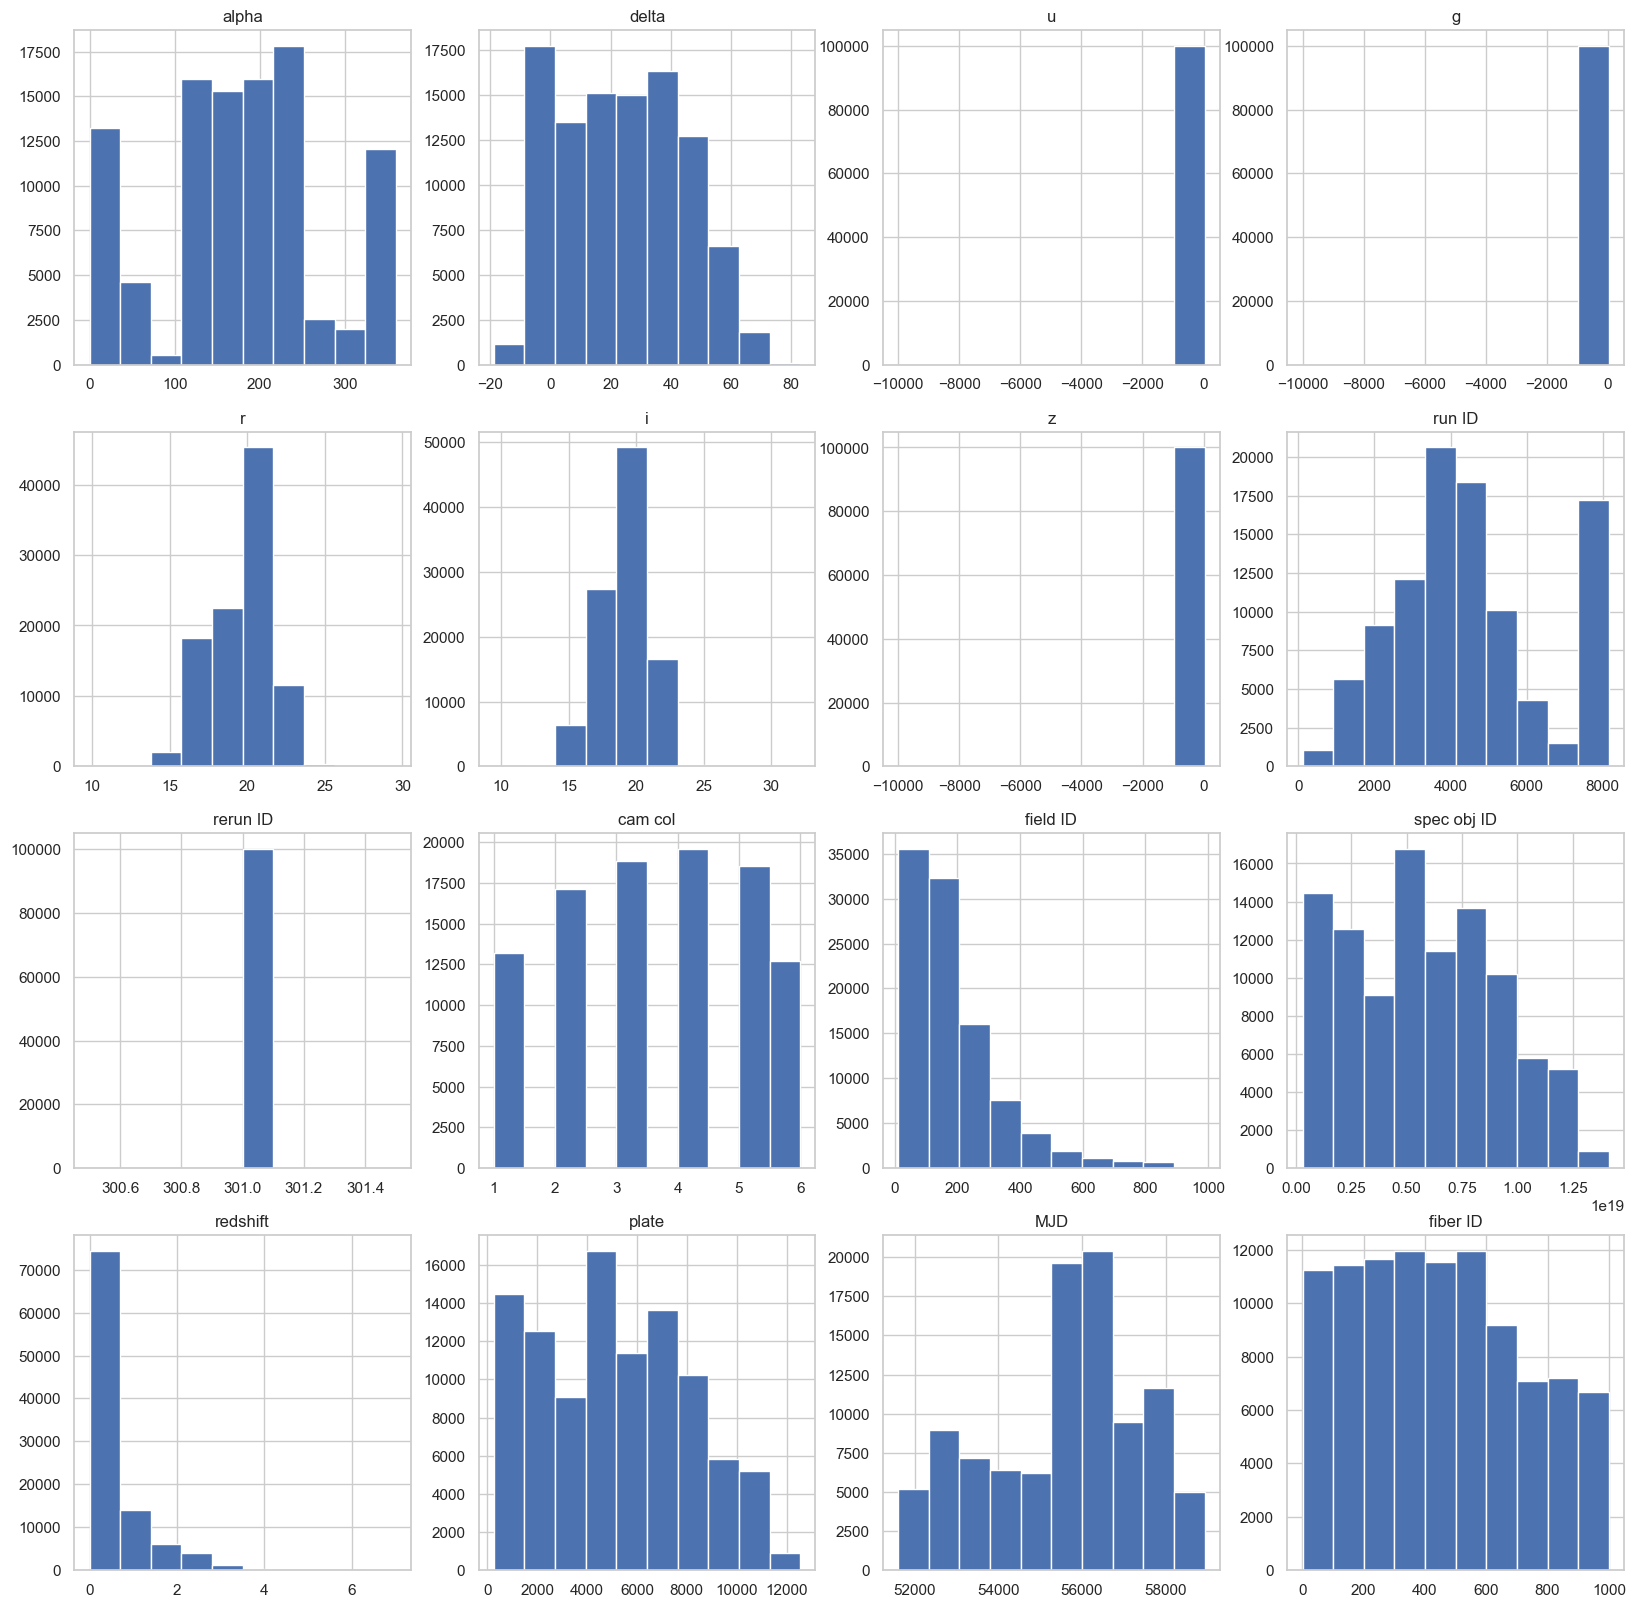

In [12]:
plt.figure(figsize=(20,20))
index = 1
for column in columns :
    plt.subplot(4,4,index)
    plt.hist(features_stellar[column])
    plt.title(column.replace("_"," "))
    index +=1

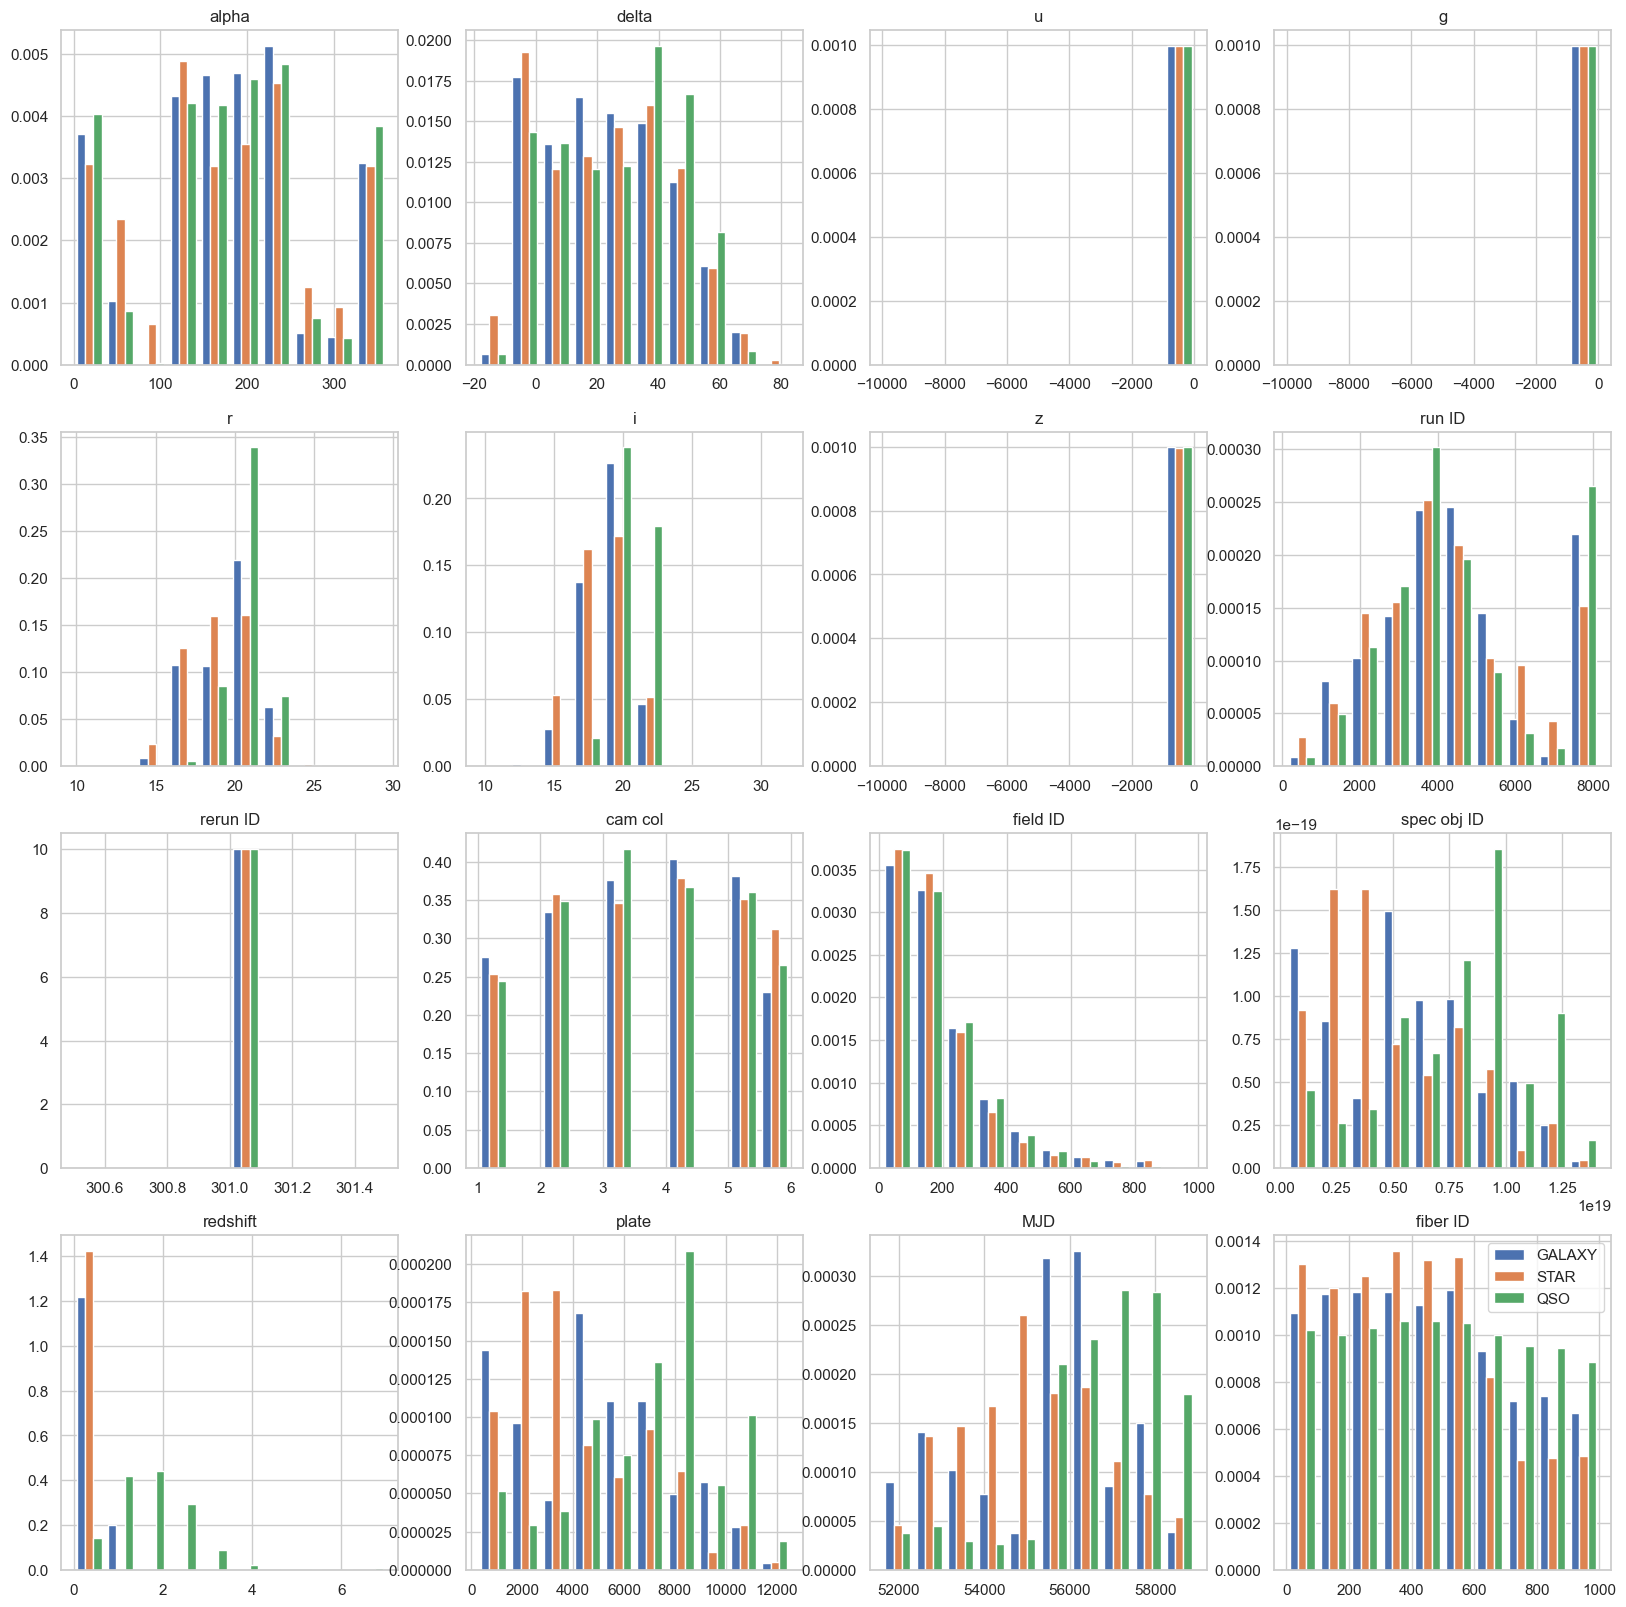

In [13]:
plt.figure(figsize=(20,20))
index = 1
for column in columns :
    plt.subplot(4,4,index)
    plt.hist(# data_stellar has class columns which will surve us here
        [data_stellar[data_stellar['class']=='GALAXY'][column],
        data_stellar[data_stellar['class']=='STAR'][column],
        data_stellar[data_stellar['class']=='QSO'][column]], label=['GALAXY','STAR','QSO'],density=True)
    plt.title(column.replace("_"," "))
    index +=1
plt.legend()

In short, the variable : " obj_ID, u, g, z, return ID " won't help much in the classification

## Preparation of data

deleting useless features :

In [14]:
data_stellar.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [15]:
data_stellar.drop(['obj_ID','u', 'g','z','rerun_ID'],axis=1,inplace=True)

In [16]:
data_stellar

,alpha,delta,r,i,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,20.39501,19.16573,3606,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,144.826101,31.274185,22.58444,21.16812,4518,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,142.188790,35.582444,20.60976,19.34857,3606,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,338.741038,-0.402828,21.61162,20.50454,4192,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,345.282593,21.183866,16.49747,15.97711,8102,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,21.90404,21.30548,7778,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,29.493819,19.798874,20.45003,19.75759,7917,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,224.587407,15.700707,18.20428,17.69034,5314,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,212.268621,46.660365,19.91386,19.07254,3650,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


### NORMALISATION OF DATA 

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
data_stellar.head()

,alpha,delta,r,i,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,20.39501,19.16573,3606,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,144.826101,31.274185,22.58444,21.16812,4518,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,142.188790,35.582444,20.60976,19.34857,3606,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,338.741038,-0.402828,21.61162,20.50454,4192,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,345.282593,21.183866,16.49747,15.97711,8102,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [19]:
features_stellar = data_stellar.copy()
labels = features_stellar['class']
features_stellar.drop("class",axis=1,inplace= True)
features_stellar.head()

,alpha,delta,r,i,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,20.39501,19.16573,3606,2,79,6.543777e+18,0.634794,5812,56354,171
1,144.826101,31.274185,22.58444,21.16812,4518,5,119,1.176014e+19,0.779136,10445,58158,427
2,142.188790,35.582444,20.60976,19.34857,3606,2,120,5.152200e+18,0.644195,4576,55592,299
3,338.741038,-0.402828,21.61162,20.50454,4192,3,214,1.030107e+19,0.932346,9149,58039,775
4,345.282593,21.183866,16.49747,15.97711,8102,3,137,6.891865e+18,0.116123,6121,56187,842


In [20]:
features_stellar_scaled = StandardScaler().fit_transform(features_stellar)

In [21]:
features_stellar_scaled = pd.DataFrame(features_stellar_scaled, columns= list(features_stellar.columns))

In [22]:
features_stellar_scaled.head()

,alpha,delta,r,i,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
0,-0.434604,0.425529,0.403962,0.046007,-0.445535,-0.952553,-0.718947,0.228609,0.079557,0.228633,0.423203,-1.021342
1,-0.339921,0.363402,1.584406,1.185097,0.018646,0.937920,-0.450509,1.797912,0.277096,1.797924,1.420729,-0.081883
2,-0.367251,0.582713,0.519745,0.150019,-0.445535,-0.952553,-0.443798,-0.190037,0.092423,-0.190025,0.001854,-0.551612
3,1.669523,-1.249105,1.059904,0.807610,-0.147278,-0.322395,0.187031,1.358962,0.486770,1.358942,1.354927,1.195196
4,1.737310,-0.150242,-1.697421,-1.767887,1.842792,-0.322395,-0.329712,0.333328,-0.630267,0.333297,0.330860,1.441070


## Data division for training and test 

In [34]:
fv_train, fv_test, labels_train, labels_test = train_test_split(features_stellar_scaled, labels, test_size=0.3,random_state=24)
fv_train_scaled, fv_test_scaled, labels_train_scaled, labels_test_scaled = train_test_split(features_stellar_scaled, labels, test_size=0.3,random_state=23)

In [24]:
fv_train.shape, fv_test.shape

((70000, 12), (30000, 12))

## Classification:

In [25]:
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [26]:
# Pré-traitement des données
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Pour tester les performances des modèles utilisés
from sklearn import metrics

# Classification
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

# Resampling 
from sklearn.utils import resample

KNN:

In [27]:
parameters = {
    'n_neighbors': np.arange(1,16,2),
    'p': np.arange(1,3,1)
}
knn = KNeighborsClassifier()# the intuition 
clf = GridSearchCV(estimator=knn, param_grid=parameters, return_train_score=True)
clf.fit(fv_train, labels_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15]),
                         'p': array([1, 2])},
             return_train_score=True)

In [28]:
parameters = {'n_neighbors':np.arange(1,20,2), 'p' : np.arange(1,3,1)} # pas de 2 pour ne garder que les pas impaires
knn=KNeighborsClassifier()
clf1 = GridSearchCV(estimator=knn, param_grid=parameters, return_train_score=True)
clf1.fit(fv_train,labels_train)
knn=KNeighborsClassifier(**clf1.best_params_)
knn.fit(fv_train,labels_train)

KNeighborsClassifier(n_neighbors=19)

In [29]:
pd.DataFrame(clf1.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
19,0.179109,0.024961,5.136805,0.692975,19,2,"{'n_neighbors': 19, 'p': 2}",0.585643,0.583143,0.584000,...,0.583857,0.001037,1,0.596893,0.597268,0.597464,0.597661,0.597750,0.597407,0.000306
18,0.176236,0.015256,7.270737,0.286623,19,1,"{'n_neighbors': 19, 'p': 1}",0.586214,0.584000,0.583786,...,0.583600,0.001569,2,0.596857,0.597071,0.597679,0.598036,0.597482,0.597425,0.000421
16,0.219930,0.019051,7.374221,0.454227,17,1,"{'n_neighbors': 17, 'p': 1}",0.583929,0.580500,0.581786,...,0.581600,0.001296,3,0.597571,0.597625,0.598714,0.598286,0.598554,0.598150,0.000471
17,0.207729,0.027823,4.660916,0.262731,17,2,"{'n_neighbors': 17, 'p': 2}",0.582643,0.580000,0.581000,...,0.581143,0.000856,4,0.598571,0.599464,0.597786,0.599036,0.597893,0.598550,0.000646
14,0.222770,0.021023,5.907896,0.393976,15,1,"{'n_neighbors': 15, 'p': 1}",0.580500,0.574714,0.578714,...,0.578229,0.002113,5,0.599554,0.600804,0.600071,0.600518,0.600393,0.600268,0.000428


Accuracy :  0.5842666666666667
F1-score KNN :  0.26318400406146675


Text(0.5, 1.0, 'Confusion matrix')

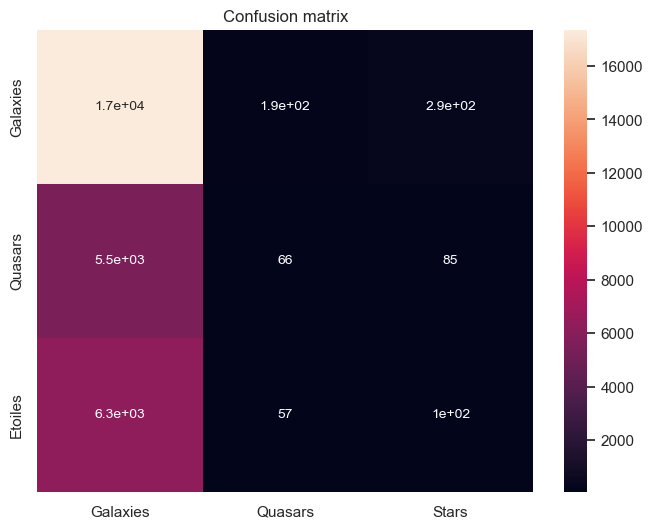

In [30]:
yknn=knn.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(labels_test, yknn))
print("F1-score KNN : ",metrics.f1_score(labels_test, yknn, average='macro'))

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(labels_test, yknn), annot=True, annot_kws={"size": 10}, yticklabels=["Galaxies", "Quasars", "Etoiles"], xticklabels=["Galaxies", "Quasars", "Stars"])
plt.title('Confusion matrix')

In [35]:
parameters = {'n_neighbors':np.arange(1,20,2), 'p' : np.arange(1,3,1)}
knn_scaled=KNeighborsClassifier()
clf = GridSearchCV(knn_scaled, parameters)
clf.fit(fv_train_scaled,labels_train_scaled)
knn_scaled=KNeighborsClassifier(**clf.best_params_)
knn_scaled.fit(fv_train_scaled,labels_train_scaled)

KNeighborsClassifier(n_neighbors=3, p=1)

In [36]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.199288,0.029472,3.398426,0.793358,3,1,"{'n_neighbors': 3, 'p': 1}",0.898643,0.900286,0.899571,0.905929,0.899429,0.900771,0.002631,1
4,0.186476,0.018400,3.805220,0.650961,5,1,"{'n_neighbors': 5, 'p': 1}",0.898429,0.897571,0.897929,0.904857,0.899643,0.899686,0.002679,2
6,0.188754,0.028859,4.699935,0.906286,7,1,"{'n_neighbors': 7, 'p': 1}",0.895786,0.895857,0.897786,0.904357,0.898429,0.898443,0.003136,3
3,0.201619,0.029680,2.807392,0.403768,3,2,"{'n_neighbors': 3, 'p': 2}",0.893857,0.897000,0.893500,0.902286,0.894214,0.896171,0.003298,4
8,0.179139,0.011236,4.522802,0.750462,9,1,"{'n_neighbors': 9, 'p': 1}",0.893429,0.894357,0.894929,0.899500,0.895857,0.895614,0.002097,5


Accuracy :  0.9024666666666666
F1-score KNN :  0.8863331426424578


Text(0.5, 1.0, 'Confusion matrix')

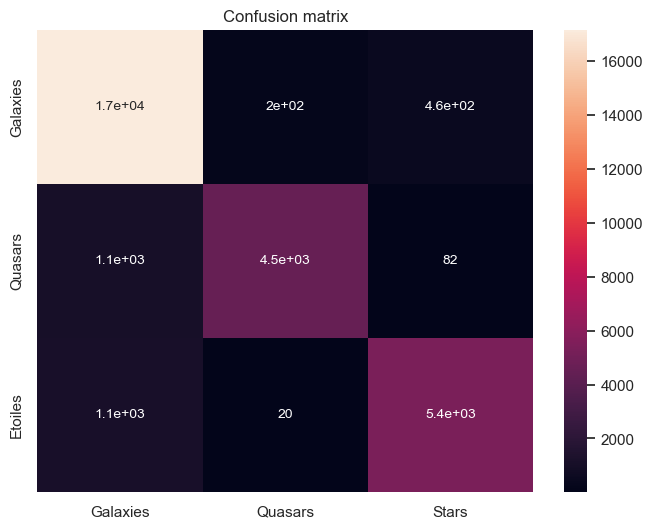

In [38]:
yknn=knn_scaled.predict(fv_test_scaled)
print("Accuracy : ",metrics.accuracy_score(labels_test_scaled, yknn))
print("F1-score KNN : ",metrics.f1_score(labels_test_scaled, yknn, average='macro'))

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(labels_test_scaled, yknn), annot=True, annot_kws={"size": 10}, yticklabels=["Galaxies", "Quasars", "Etoiles"], xticklabels=["Galaxies", "Quasars", "Stars"])
plt.title('Confusion matrix')